This makes use of the modified version of the function `adjacent_edges` provided in the textbook which allows $k$ to odd.

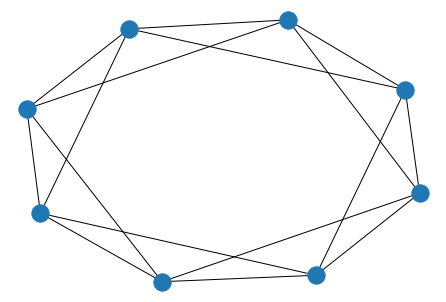

In [22]:
import networkx as nx

"""
This generates a regular graph with n nodes and k neighbors per node.

Mathematically, a graph cannot be generated when n is odd and k is odd

All the magic happens in the modified adjacent_edges

Lastly, not using nx.draw_circular allows weird-looking graphs to be generated
"""

def adjacent_edges(nodes, k):
    n = len(nodes)
    
    if k%2 != 0 and n%2 != 0:                                   # Checks if n is odd and k is odd
        raise ValueError('k cannot be odd when n is odd')       # Raises the value error
    
    else:
        if k % 2 == 0:                                          # This part is similar to the one in the book
            k = k//2
            
            for i in range(n):
                for j in range(i+1, i+k+1):
                    yield nodes[i], nodes[j%n]                  # Except that it uses the actual values of the nodes
                
        else:                                                   # Runs this part if k is odd
            k = (k-1) // 2                                      # Turns odd k into even k and repeats the above code

            for i in range(n):
                for j in range(i+1-k, i+k+1):
                    yield nodes[i], nodes[j%n]
                
                yield nodes[i], nodes[(i+n//2)%n]               # This adds an edge to the opposite node

def make_regular_graph(node, k):
    G = nx.Graph()                                              # Creates the initial graph G
    
    G.add_nodes_from(range(node))
    G.add_edges_from(adjacent_edges(range(node),k))             # Runs the adjacent_edges function
    
    return G

nx.draw(make_regular_graph(8, 4))                              # Note that this could generate non-circular graphs
#nx.draw_circular(make_regular_graph(8, 3))                      # Use this to make non-weird graphs